<a href="https://colab.research.google.com/github/kat-le/cmpe255-pycaret/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret[full] kaggle
!kaggle -v

Kaggle API 1.7.4.5


In [ ]:
import pycaret
pycaret.__version__

'3.3.2'

In [ ]:
from google.colab import files
up = files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls -la ~/.kaggle

Saving kaggle.json to kaggle (2).json
total 16
drwxr-xr-x 2 root root 4096 Oct 30 01:20 .
drwx------ 1 root root 4096 Oct 30 01:20 ..
-rw------- 1 root root   65 Oct 30 01:43 kaggle.json


In [ ]:
!mkdir -p data
!kaggle datasets download -d abdallahwagih/mall-customers-segmentation -p data --unzip
!ls -lah data

Dataset URL: https://www.kaggle.com/datasets/abdallahwagih/mall-customers-segmentation
License(s): apache-2.0
  0% 0.00/1.56k [00:00<?, ?B/s]
100% 1.56k/1.56k [00:00<00:00, 3.65MB/s]
total 836K
drwxr-xr-x 2 root root 4.0K Oct 30 01:43  .
drwxr-xr-x 1 root root 4.0K Oct 30 01:43  ..
-rw-r--r-- 1 root root 4.2K Oct 30 01:43  Mall_Customers.csv
-rw-r--r-- 1 root root 817K Oct 30 01:29 'Shopping Mall Customer Segmentation Data .csv'


In [ ]:
import pandas as pd
import glob, os

csvs = sorted(glob.glob(os.path.join("data", "**", "*.csv"), recursive=True))
csvs

['data/Mall_Customers.csv',
 'data/Shopping Mall Customer Segmentation Data .csv']

In [ ]:
df = pd.read_csv("data/Mall_Customers.csv")
df.shape, df.head()

((200, 5),
    CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
 0           1    Male   19                  15                      39
 1           2    Male   21                  15                      81
 2           3  Female   20                  16                       6
 3           4  Female   23                  16                      77
 4           5  Female   31                  17                      40)

In [ ]:
from pycaret.clustering import *

s = setup(
    df,
    session_id = 123,
)

,Description,Value
0,Session id,123
1,Original data shape,"(200, 5)"
2,Transformed data shape,"(200, 5)"
3,Numeric features,4
4,Categorical features,1
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


In [ ]:
from pycaret.clustering import ClusteringExperiment

exp = ClusteringExperiment()

In [ ]:
exp.setup(df, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(200, 5)"
2,Transformed data shape,"(200, 5)"
3,Numeric features,4
4,Categorical features,1
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


In [ ]:
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4209,260.8046,0.8565,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [ ]:
meanshift = create_model('meanshift')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
kmeans_cluster = assign_model(kmeans)
kmeans_cluster

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,Cluster 1
1,2,Male,21,15,81,Cluster 1
2,3,Female,20,16,6,Cluster 1
3,4,Female,23,16,77,Cluster 1
4,5,Female,31,17,40,Cluster 1
...,...,...,...,...,...,...
195,196,Female,35,120,79,Cluster 2
196,197,Female,45,126,28,Cluster 3
197,198,Male,32,126,74,Cluster 2
198,199,Male,32,137,18,Cluster 3


In [ ]:
plot_model(kmeans, plot = 'cluster')

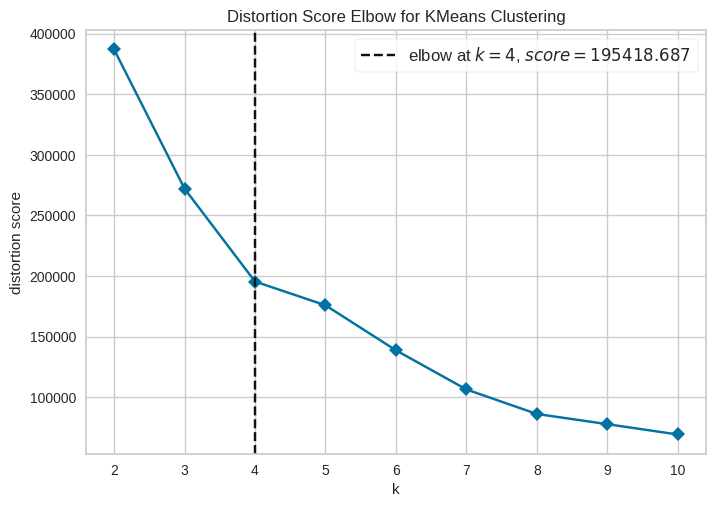

In [ ]:
plot_model(kmeans, plot = 'elbow')

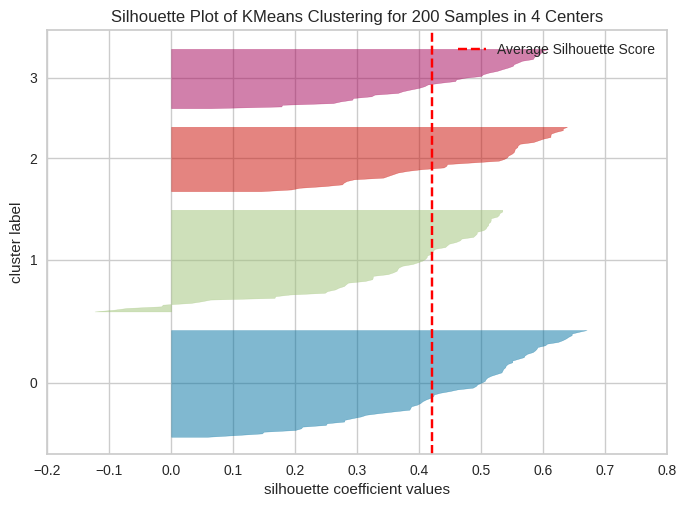

In [ ]:
plot_model(kmeans, plot = 'silhouette')

In [ ]:
kmeans_pred = predict_model(kmeans, data=df)
kmeans_pred

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1.0,1.0,19.0,15.0,39.0,Cluster 1
1,2.0,1.0,21.0,15.0,81.0,Cluster 1
2,3.0,0.0,20.0,16.0,6.0,Cluster 1
3,4.0,0.0,23.0,16.0,77.0,Cluster 1
4,5.0,0.0,31.0,17.0,40.0,Cluster 1
...,...,...,...,...,...,...
195,196.0,0.0,35.0,120.0,79.0,Cluster 2
196,197.0,0.0,45.0,126.0,28.0,Cluster 3
197,198.0,1.0,32.0,126.0,74.0,Cluster 2
198,199.0,1.0,32.0,137.0,18.0,Cluster 3


In [ ]:
save_model(kmeans, 'kmeans_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['CustomerID', 'Age',
                                              'Annual Income (k$)',
                                              'Spending Score (1-100)'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Genre'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['Genre'],
                                     transformer=OrdinalEncoder(cols=['Genre'],
                                                                handle_missing='return_nan',
                                                                mapping=[{'col': 'Genre',
                                                                          'data_type': dtype('O'),


In [ ]:
kmeans_pipeline = load_model('kmeans_pipeline')
kmeans_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['CustomerID', 'Age',
                                             'Annual Income (k$)',
                                             'Spending Score (1-100)'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Genre'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerWrapper(include=['Genre'],
                                    transformer=OrdinalEncoder(cols=['Genre'],
                                                               handle_missing='return_nan',
                                                               mapping=[{'col': 'Genre',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': Female    0
Male      1
NaN      -1
dtype: int64}]))),
                ('trained_model', KMeans(n_clusters=4, random_state=123))])